In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
! pip install tab2img

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Conv1D, MaxPool1D, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler
from tab2img.converter import Tab2Img
from sklearn.preprocessing import OneHotEncoder
from keras.regularizers import l2

In [ ]:
#oh= OneHotEncoder(sparse_output=False).set_output(transform="pandas")
#one_hot_encoded=oh.fit_transform(df[["Profession"]])
#df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=["Profession"])

In [4]:
# load the dataset
df_train = pd.read_csv('/kaggle/input/nsl-kdd/KDDTrain.txt', header=None)
df_test = pd.read_csv('/kaggle/input/nsl-kdd/KDDTest.txt', header=None)
#df_train20 = pd.read_csv('KDDTrain+_20Percent.txt', header=None)

In [5]:
# check the shape of the dataset
print(df_train.shape, df_test.shape)

(125973, 43) (22544, 43)


In [6]:
# add columns in the train dataset
df_train.columns = ['duration','protocol_type','service','flag','src_bytes','dst_byte','land','wrong_fragment',
                    'urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted',
                    'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_logins',
                    'is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
                    'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
            'dst_host_same_srv_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
        'dst_host_rerror_rate','dst_host_srv_rerror_rate','class','difficulty_level']



# add columns in the test dataset

df_test.columns = ['duration','protocol_type','service','flag','src_bytes','dst_byte','land','wrong_fragment',
                    'urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted',
                    'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_logins',
                    'is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
                    'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
            'dst_host_same_srv_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
        'dst_host_rerror_rate','dst_host_srv_rerror_rate','class','difficulty_level']

In [7]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_byte,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_srv_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [8]:
df_train.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_byte                         int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_logins                   int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [9]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_byte,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_srv_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [10]:
# identify the missing values
df_train.isnull().values.any(), df_test.isnull().values.any()

(False, False)

In [11]:
#get binary columns
binary_train = [col for col in df_train if (len(df_train[col].value_counts()) > 0) & all(df_train[col].value_counts().index.isin([0, 1]))]
binary_test = [col for col in df_test if (len(df_test[col].value_counts()) > 0) & all(df_test[col].value_counts().index.isin([0, 1]))]

print(f'Binary columns in:\n Training dataset are: {len(binary_train)}\n Test dataset are: {len(binary_test)}')

Binary columns in:
 Training dataset are: 6
 Test dataset are: 6


In [13]:
discrete_train = df_train.select_dtypes(include=['int']).columns.tolist()
continuous_train = df_train.select_dtypes(include=['float']).columns.tolist()

print('Dicrete data', len(discrete_train))
print('Continuous data',len(continuous_train))

Dicrete data 24
Continuous data 15


In [14]:
#get categorical columns
cat_train = df_train.select_dtypes(include=['object']).columns.tolist()
cat_test = df_test.select_dtypes(include=['object']).columns.tolist()
print(f'Categorical columns in:\n Training dataset are: {len(cat_train)}\n Test dataset are: {len(cat_test)}')

Categorical columns in:
 Training dataset are: 4
 Test dataset are: 4


In [15]:
# categorical columns
cat_train

['protocol_type', 'service', 'flag', 'class']

In [18]:
oh= OneHotEncoder(sparse_output=False).set_output(transform="pandas")
# train dataset
one_hot_encoded_train=oh.fit_transform(df_train[['protocol_type', 'service', 'flag']])
df_train_ohe = pd.concat([df_train,one_hot_encoded_train],axis=1).drop(columns=['protocol_type', 'service', 'flag'])
# test dataset only Transform (without fit)
one_hot_encoded_test=oh.transform(df_test[['protocol_type', 'service', 'flag']])
df_test_ohe = pd.concat([df_test,one_hot_encoded_test],axis=1).drop(columns=['protocol_type', 'service', 'flag'])

In [19]:
df_train_ohe.shape, df_test_ohe.shape

((125973, 124), (22544, 124))

In [20]:
# verify the columns in train and test sets are the same 
print(all(x == y for x, y in zip(df_test_ohe.columns, df_train_ohe.columns)))  # Output: True

True


In [ ]:
#df_concat = pd.concat([df_train_onehot, df_test_onehot], ignore_index=True)
#print(df_concat)
#df_concat.isnull().values.any()
#col = set(df_train_onehot.columns).intersection(set(df_test_onehot.columns))
#len(col)
#set(df_train_onehot.columns).difference(set(df_test_onehot.columns))

In [21]:
#copy data from the original
df_data_train = df_train_ohe.copy()
df_data_test = df_test_ohe.copy()
df_data_train.shape, df_data_test.shape

((125973, 124), (22544, 124))

In [22]:
#fixing labels on the training column 'class'
classlist_train = []
attack1 = ("apache2","back","land","neptune","mailbomb","pod","processtable","smurf","teardrop","udpstorm","worm")
attack2 = ("ipsweep","mscan","nmap","portsweep","saint","satan")
attack3 = ("buffer_overflow","loadmodule","perl","ps","rootkit","sqlattack","xterm")
attack4 = ("ftp_write","guess_passwd","httptunnel","imap","multihop","named","phf","sendmail","Snmpgetattack","spy","snmpguess","warezclient","warezmaster","xlock","xsnoop")

# initialize the count of each attack category
DoS = 0;Probe = 0;U2R = 0;R2L = 0;Normal = 0

for i in df_data_train['class']:
  if i in attack1:
    classlist_train.append('DoS')
    DoS += 1
  elif i in attack2:
    classlist_train.append('Probe')
    Probe += 1
  elif i in attack3:
    classlist_train.append('U2R')
    U2R += 1
  elif i in attack4:
    classlist_train.append('R2L')
    R2L += 1
  else:
    classlist_train.append('Normal')
    Normal += 1


print('Number of attacks in groups (Training dataset):\n')
print('DoS:{}, Probe:{}, U2R:{}, R2L:{}, Normal:{}'.format(DoS, Probe, U2R, R2L, Normal))

Number of attacks in groups (Training dataset):

DoS:45927, Probe:11656, U2R:52, R2L:995, Normal:67343


In [23]:
#fixing labels on the testing column 'class'

classlist_test = []
attack1 = ("apache2","back","land","neptune","mailbomb","pod","processtable","smurf","teardrop","udpstorm","worm")
attack2 = ("ipsweep","mscan","nmap","portsweep","saint","satan")
attack3 = ("buffer_overflow","loadmodule","perl","ps","rootkit","sqlattack","xterm")
attack4 = ("ftp_write","guess_passwd","httptunnel","imap","multihop","named","phf","sendmail","Snmpgetattack","spy","snmpguess","warezclient","warezmaster","xlock","xsnoop")

# initialize the count of each attack category
DoS = 0;Probe = 0;U2R = 0;R2L = 0;Normal = 0

for i in df_data_test['class']:
  if i in attack1:
    classlist_test.append('DoS')
    DoS += 1
  elif i in attack2:
    classlist_test.append('Probe')
    Probe += 1
  elif i in attack3:
    classlist_test.append('U2R')
    U2R += 1
  elif i in attack4:
    classlist_test.append('R2L')
    R2L += 1
  else:
    classlist_test.append('Normal')
    Normal += 1

print('Number of attacks in groups (Test dataset):\n')
print('DoS:{}, Probe:{}, U2R:{}, R2L:{}, Normal:{}'.format(DoS, Probe, U2R, R2L, Normal))

Number of attacks in groups (Test dataset):

DoS:7460, Probe:2421, U2R:67, R2L:2707, Normal:9889


In [24]:
#view the class list
classlist_train[:5], classlist_test[:5]

(['Normal', 'Normal', 'DoS', 'Normal', 'Normal'],
 ['DoS', 'DoS', 'Normal', 'Probe', 'Probe'])

In [25]:
# now append the class column to the dataFrames
df_data_train['class'] = classlist_train
df_data_test['class'] = classlist_test

In [28]:
#verify categorical variables
#only the label class
df_data_train.select_dtypes('object').head()

,class
0,Normal
1,Normal
2,DoS
3,Normal
4,Normal


In [29]:
#verify categorical variables
#only the label class
df_data_test.select_dtypes('object').head()

,class
0,DoS
1,DoS
2,Normal
3,Probe
4,Probe


In [30]:
#separate labels from the dataset
y_train = df_data_train.pop('class')

# the remaining data will be X
X_train = df_data_train
print(X_train.shape, y_train.shape)

(125973, 123) (125973,)


In [31]:
#separate labels from the dataset
y_test = df_data_test.pop('class')

# the remaining data will be X
X_test = df_data_test
print(X_test.shape, y_test.shape)

(22544, 123) (22544,)


In [32]:
# encoding labels function

# binary classification (0 for normal and 1 for attack)
def attack_encode_bin(attack):
  if attack == 'Normal':
    return 0
  else:
    return 1
      
# multi-class classification

# multi-labels (0,1,2,3,4)
def attack_encode_mult(attack):
  if attack == 'Normal':
    return 0
  elif attack == 'DoS':
    return 1
  elif attack == 'Probe':
    return 2
  elif attack == 'U2R':
    return 3
  else:
    return 4

In [33]:
# binary classification labels
y_train_bin = y_train.apply(attack_encode_bin)
print(y_train_bin.unique())

[0 1]


In [34]:
# binary classification labels
y_test_bin = y_test.apply(attack_encode_bin)
print(y_test_bin.unique())

[1 0]


In [35]:
# multi-class classification labels
y_train_mult = y_train.apply(attack_encode_mult)
print(y_train_mult.unique())

[0 1 4 2 3]


In [36]:
# multi-class classification labels
y_test_mult = y_test.apply(attack_encode_mult)
print(y_test_mult.unique())

[1 0 2 4 3]


In [37]:
# binarize labels for multi-class
y_train_mult_b = LabelBinarizer().fit_transform(y_train_mult)
print(y_train_mult_b[:3])

[[1 0 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]]


In [38]:
# binarize labels for multi-class
y_test_mult_b = LabelBinarizer().fit_transform(y_test_mult)
print(y_test_mult_b[:3])

[[0 1 0 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]]


In [52]:
type(y_train_mult_b),type(y_test_mult_b), type(y_test_mult), type(y_test_mult.values)

(numpy.ndarray, numpy.ndarray, pandas.core.series.Series, numpy.ndarray)

In [39]:
X_train.shape, X_test.shape

((125973, 123), (22544, 123))

In [40]:
X_train

,duration,src_bytes,dst_byte,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,146,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,232,8153,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,199,420,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
125969,8,105,145,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125970,0,2231,384,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125971,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [41]:
#scaler = MinMaxScaler(feature_range=(0,255))
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
X_train

array([[0.00000000e+00, 3.55806412e-07, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.05799870e-07, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 1.61670897e-06, 2.93143779e-07, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.09423153e-07, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [43]:
type(X_train)

numpy.ndarray

In [47]:
target

array([5, 5, 2, ..., 3, 3, 3], dtype=int32)

In [53]:
y_test_mult.values

array([1, 1, 0, ..., 1, 0, 2])

In [54]:
# convert dataset into images
# training dataset
model_nsl = Tab2Img()
images_mult_train = model_nsl.fit_transform(X_train, y_train_mult.values)

In [56]:
# convert dataset into images
# test dataset 
images_mult_test = model_nsl.transform(X_test)

In [57]:
images_mult_train.shape, images_mult_test.shape

((125973, 12, 12), (22544, 12, 12))

/tmp/ipykernel_75/2886958239.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 6, i+1)


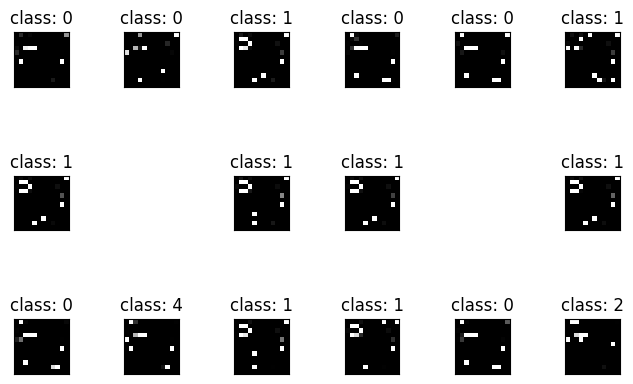

In [58]:
# Visualize the dataset
for i in range(18):
    plt.subplot(3, 6, i+1)
    plt.tight_layout()
    plt.imshow(images_mult_train[i], cmap='gray', interpolation='none')
    plt.title('class: {}'.format(y_train_mult.values[i]))
    plt.yticks([])
    plt.xticks([])

/tmp/ipykernel_75/2292929101.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 6, i+1)


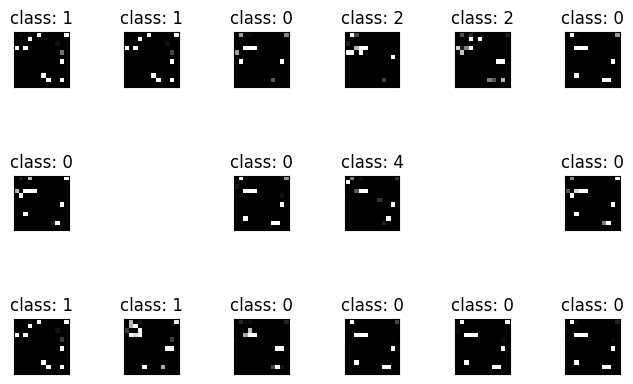

In [59]:
for i in range(18):
    plt.subplot(3, 6, i+1)
    plt.tight_layout()
    plt.imshow(images_mult_test[i], cmap='gray', interpolation='none')
    plt.title('class: {}'.format(y_test_mult.values[i]))
    plt.yticks([])
    plt.xticks([])

In [60]:
images_mult_train.shape, images_mult_test.shape

((125973, 12, 12), (22544, 12, 12))

In [61]:
X_train = images_mult_train.reshape(images_mult_train.shape[0], images_mult_train.shape[1],images_mult_train.shape[2], 1)
X_test = images_mult_test.reshape(images_mult_test.shape[0],images_mult_test.shape[1],images_mult_test.shape[2], 1)

In [62]:
X_train.shape, X_test.shape

((125973, 12, 12, 1), (22544, 12, 12, 1))

In [63]:
# reshaping
X_train = X_train/255
X_test = X_test/255

In [64]:
# multi-class classification

model_mult = Sequential()
model_mult.add(Conv2D(32,3,padding='same', input_shape=(12,12,1),activation='relu'))
model_mult.add(Conv2D(64,3,padding='same',activation='relu'))
model_mult.add(MaxPool2D(pool_size=(4)))
model_mult.add(Dropout(0.5))

model_mult.add(Conv2D(64,3,padding='same',activation='relu'))
#model_mult.add(MaxPool2D(pool_size=(4)))
model_mult.add(Dropout(0.5))

model_mult.add(Flatten())
#model_mult.add(Dense(64, activation='relu'))
model_mult.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01)))
model_mult.add(Dropout(0.5))
model_mult.add(Dense(units=5, activation='softmax'))

optimizer = keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)

model_mult.compile(loss='categorical_crossentropy', optimizer=optimizer,
                  metrics=['accuracy'])

model_mult.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/conda/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 12, 12, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,997 (363.27 KB)

 Trainable params: 92,997 (363.27 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
# define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [66]:
# training the model
history = model_mult.fit(X_train, y_train_mult_b, epochs=150, batch_size=500,
                         validation_split=0.2, shuffle=True, callbacks=[early_stopping])

Epoch 1/150


I0000 00:00:1731054241.907765     442 service.cc:145] XLA service 0x786ca8005650 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731054241.907830     442 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1731054241.907834     442 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 21/202 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4411 - loss: 2.5093

I0000 00:00:1731054250.838770     442 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


202/202 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.4951 - loss: 1.6135 - val_accuracy: 0.5338 - val_loss: 0.9811
Epoch 2/150
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5332 - loss: 0.9908 - val_accuracy: 0.5338 - val_loss: 0.9723
Epoch 3/150
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5357 - loss: 0.9850 - val_accuracy: 0.5338 - val_loss: 0.9700
Epoch 4/150
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5355 - loss: 0.9760 - val_accuracy: 0.5338 - val_loss: 0.9650
Epoch 5/150
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5331 - loss: 0.9678 - val_accuracy: 0.8497 - val_loss: 0.5284
Epoch 6/150
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8366 - loss: 0.5311 - val_accuracy: 0.8468 - val_loss: 0.3419
Epoch 7/150
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8739 - loss: 0.3772 - val_accuracy: 0.9264 - val_loss: 0.2732
Epoch 8/150
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9119 - loss: 0.3159 - val_accuracy: 0.93

In [ ]:
# training dataset results

#print(f'Training prediction\n Loss: {test_pred[0]}\n Accuracy: {test_pred[1]*100}%')
#history.history['accuracy']

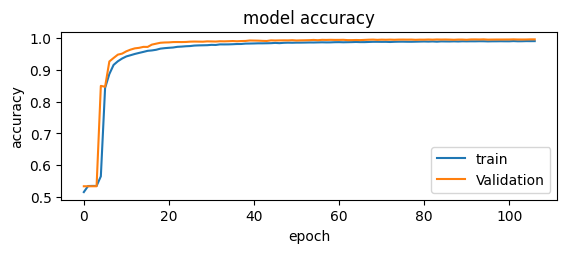

In [67]:
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='lower right')

In [ ]:
#X_test[0]

In [68]:
# predicting target on test data
test_pred = model_mult.evaluate(X_test, y_test_mult_b, verbose=1)
print(f'Test results\n Loss: {test_pred[0]}\n Accuracy: {test_pred[1]*100}%')

705/705 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8213 - loss: 0.8320
Test results
 Loss: 0.8412759900093079
 Accuracy: 81.8222165107727%


In [69]:
# on test dataset
y_pred = model_mult.predict(X_test, batch_size=500)

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [70]:
# print the classification report on the test data

class_names = ['Normal', 'DoS','Probe','U2R','R2L']
y_rounded_pred = np.round(y_pred)
print("Classification Report on Test data\n",
     classification_report(y_test_mult_b, y_rounded_pred, target_names=class_names))

Classification Report on Test data
               precision    recall  f1-score   support

      Normal       0.78      0.94      0.85      9889
         DoS       0.96      0.86      0.90      7460
       Probe       0.75      0.80      0.77      2421
         U2R       0.00      0.00      0.00        67
         R2L       0.90      0.25      0.39      2707

   micro avg       0.83      0.81      0.82     22544
   macro avg       0.68      0.57      0.58     22544
weighted avg       0.85      0.81      0.80     22544
 samples avg       0.81      0.81      0.81     22544



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


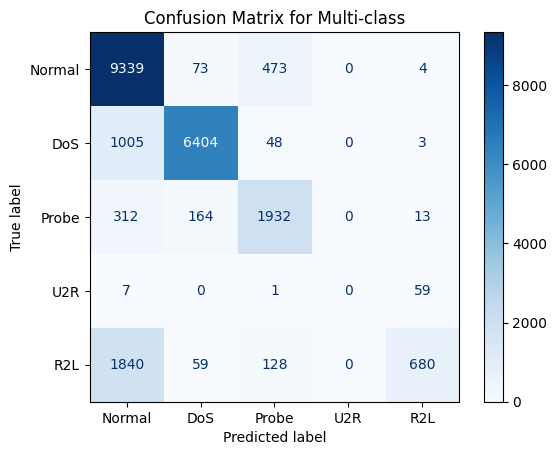

In [71]:
# view the confusion matrix for multi-class classification

cm = confusion_matrix(y_test_mult_b.argmax(axis=1), y_rounded_pred.argmax(axis=1))
cm_fig = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
cm_fig.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Multi-class')
plt.savefig('confusion_matrix_multi-class.eps')
plt.show()

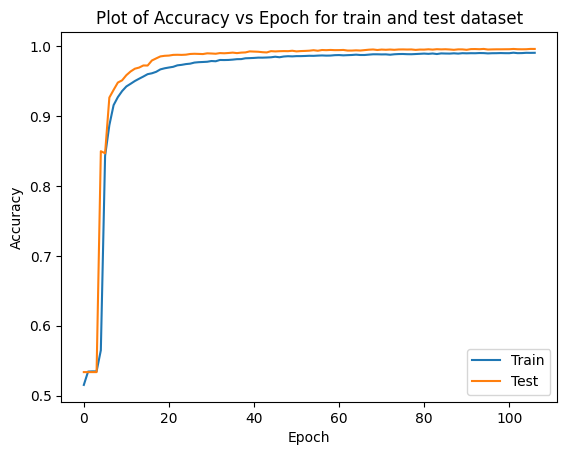

In [72]:
# plot of accuracy vs epoch for train and test dataset
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Plot of Accuracy vs Epoch for train and test dataset')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.savefig('plot_accuracy_epoch_multiclass.eps')
plt.show()